## Content
[1. Introduction ](#1)

[2. Libraries](#2)
  * [Functions & Configurations](#2.11)

[3. Feature Engineering](#3)
  * [Day](#3.1)
  * [Country]()
  * [Continent](#3.1)
  * [Price Range](#3.1)
  * [Brand](#3.1)
  * [Number of Days Transaction](#3.1)
  * [Total Order Price](#3.1)
  

[4. Exploratory Data Analysis ](#4)
  * [4.1 Question 1](#4.1)
  * [4.2 Question 2](#4.2)
  * [4.3 Question 3](#4.3)


<a id='#1'></a>
**ShopSmart Inc.** is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. 

To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.


Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.



## 1.1 Libraries and Configurations 
<a id="1"></a>

In [1]:
!pip install a-world-of-countries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import missingno
import plotly.graph_objects as go
import plotly.express as px
import awoc
import seaborn as sns
import warnings
from  IPython.display import display,Markdown

In [2]:
warnings.filterwarnings('ignore') # ignores warnings

sns.set_theme(style="white") # Set the theme style to "white"

sns.set_palette("pastel") # Set the palette to "pastel"

def printmd(value):
    """return Markdown"""
    return display(Markdown(value))
    
def get_continent(location):
    """returns continent of country value"""
    for obj in all_countries:
        if obj['Country Name'] == location:
            return obj['Continent Name']
    else:
        if location == 'Korea':
            return 'Asia'
        elif location == 'United States of America':
            return 'North America'
        return 'Other Islands'
        

def added_removed(feature_name1):
    """return dataframe of 'added to cart' products and 'removed from cart' values """
    product_added = pd.pivot(data=new_data[new_data['event_type'] == 'add_to_cart'],
                             values=feature_name1,columns='continent').mode().stack()[0]
    product_removed = pd.pivot(
        data=new_data[new_data['event_type'] == 'remove_from_cart'],
        values=feature_name1, columns='continent').mode().stack()[0]
    product_result = pd.concat([
        product_added,product_removed],axis=1, 
        ignore_index=True,names=['added to cart','removed from cart'])
    
    printmd('Each **CONTINENT** and the product customers **ADDED TO AND REMOVED FROM CART**:\n')
    display(product_result.reset_index().rename(
        columns={'level_0': 'continent', 0: 'added to cart',1:'removed from cart'}))
    print('')

def get_max_n_min_product(feature,feature_name):
    """returns least and most """
    brand_max =  new_data[new_data['event_type'] == feature]['brand'].mode()[0]
    brand_min = new_data[new_data['event_type'] == feature]['brand'].value_counts().idxmin()
    res_max = new_data[new_data['event_type'] == feature]['product_name'].mode()[0]
    res_min = new_data[new_data['event_type'] == feature]['product_name'].value_counts().idxmin()
    
    printmd('The ***most {} brand*** is **{}**'.format(feature_name,brand_max))
    printmd('The ***least {} brand*** is **{}**'.format(feature_name,brand_min))
    print('')
    printmd('The ***most {} product*** is **{}**'.format(feature_name,res_max))
    printmd('The ***least {} product*** is **{}**'.format(feature_name,res_min))

def unlock_df(df_name):
    """extracts json file and returns transformed file as dataframes"""
    new_data = df_name['event_data'].apply(json.loads)
    event_df = pd.DataFrame(item for item in new_data)
    return event_df

def visited_checkout_product(feature_name1):
    """returns visited and checked out values"""
    product_visit = pd.pivot(data=event_visit_type, values=feature_name1, columns='continent').mode().stack()[0]
    product_checkout = pd.pivot(data=checkedout, values=feature_name1, columns='continent').mode().stack()[0]
    product_result = pd.concat([product_visit,product_checkout],axis=1, ignore_index=True,names=['visit','checkout'])
    
    printmd('Each **CONTINENT** and the product customers **VISITED THE MOST**:\n')
    display(product_result.reset_index().rename(columns={'level_0': 'continent', 0: 'most visited brand',1:'most checked out'}))
    print('')
    printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

def get_percentages(d_series):
    """returns series percentages of input Series values)"""
    return round(d_series/d_series.sum()*100,2)

#### Import data files

In [3]:
customers = pd.read_csv('customers.csv')
events = pd.read_csv('events.csv')
line_items = pd.read_csv('line_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  10000 non-null  object
 1   device_id    10000 non-null  object
 2   location     10000 non-null  object
 3   currency     10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   name    15 non-null     object 
 2   price   15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147208 entries, 0 to 147207
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_id         147208 non-null  int64 
 1   customer_id      147208 non-null  object
 2   event_data       147208 non-null  object
 3   event_timestamp  147208 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9165 entries, 0 to 9164
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        9165 non-null   object
 1   customer_id     9165 non-null   object
 2   status          9165 non-null   object
 3   checked_out_at  9165 non-null   object
dtypes: object(4)
memory usage: 286.5+ KB


In [8]:
line_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741 entries, 0 to 31740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line_item_id  31741 non-null  int64 
 1   order_id      31741 non-null  object
 2   item_id       31741 non-null  int64 
 3   quantity      31741 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 992.0+ KB


In [9]:
# Merge the customers, events, line_items, orders, and products tables on the customer_id column
merged_data = pd.merge(customers, events, on='customer_id', how='outer') # merged customers and events
merged_data = pd.merge(merged_data, orders, on='customer_id', how='outer') # merged above and customer_id
merged_data = pd.merge(merged_data, line_items, on='order_id', how='outer') # merged above and order_id
merged_data = pd.merge(merged_data, products, left_on='item_id', right_on='id', how='outer') # merged above and item_id

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652958 entries, 0 to 652957
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      652958 non-null  object 
 1   device_id        652958 non-null  object 
 2   location         652958 non-null  object 
 3   currency         652958 non-null  object 
 4   event_id         652958 non-null  int64  
 5   event_data       652958 non-null  object 
 6   event_timestamp  652958 non-null  object 
 7   order_id         645885 non-null  object 
 8   status           645885 non-null  object 
 9   checked_out_at   645885 non-null  object 
 10  line_item_id     578320 non-null  float64
 11  item_id          578320 non-null  float64
 12  quantity         578320 non-null  float64
 13  id               578320 non-null  float64
 14  name             578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(5), int64(1), object(10)
me

In [10]:
merged_data.rename(columns={'name':'product_name', 'location':'country'},inplace=True) # rename some of the column names

In [11]:
new_data = pd.concat([merged_data,unlock_df(merged_data).drop(
    ['status','quantity','order_id','item_id'],
    axis=1)],axis=1).drop(['event_data','item_id','id','line_item_id','event_timestamp'],
     axis=1)
new_data.head()

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-21T12:47:11.012084,visit
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-27T11:35:50.208930,visit
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.392205,visit
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.394393,add_to_cart
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.394398,add_to_cart


In [12]:
new_data.to_csv('Sales.csv',index_label=False) # saves merged tables

In [13]:
printmd('**Missing Value Percentages**')
(new_data.isna().sum()/new_data.shape[0]*100).sort_values(ascending=False)

**Missing Value Percentages**

quantity          11.430751
product_name      11.430751
price             11.430751
order_id           1.083224
status             1.083224
checked_out_at     1.083224
customer_id        0.000000
device_id          0.000000
country            0.000000
currency           0.000000
event_id           0.000000
timestamp          0.000000
event_type         0.000000
dtype: float64

In [14]:
new_data.describe() # numerical features descriptive statistics

,event_id,quantity,price
count,652958.000000,578320.000000,578320.000000
mean,88246.576898,3.009861,707.448609
std,42528.242101,1.406914,972.915321
min,14753.000000,1.000000,5.990000
25%,51324.250000,2.000000,149.950000
50%,88382.000000,3.000000,349.990000
75%,125016.000000,4.000000,899.990000
max,161960.000000,5.000000,3999.990000


In [15]:
new_data.describe(exclude='number').T # numerical features descriptive statistics

,count,unique,top,freq
customer_id,652958,10000,eb7dcb88-073d-403e-bdd4-1e5725fe2338,372
device_id,652958,10000,5d53495a-55ac-49bf-b876-ad1ac4b8d2a4,372
country,652958,243,Korea,7496
currency,652958,3,USD,223367
order_id,645885,9165,5cc9c814-c69a-4831-9b50-92abe2c1dea2,372
status,645885,3,failed,219558
checked_out_at,645885,9165,2024-03-30 04:09:12.797464,372
product_name,578320,15,Canon EOS R5 Camera,39715
timestamp,652958,142501,2024-03-30T04:03:10.735158,24
event_type,652958,4,add_to_cart,302724


In [16]:
printmd(f'The number of duplicate rows = {len(new_data[new_data.duplicated()])}')

The number of duplicate rows = 0

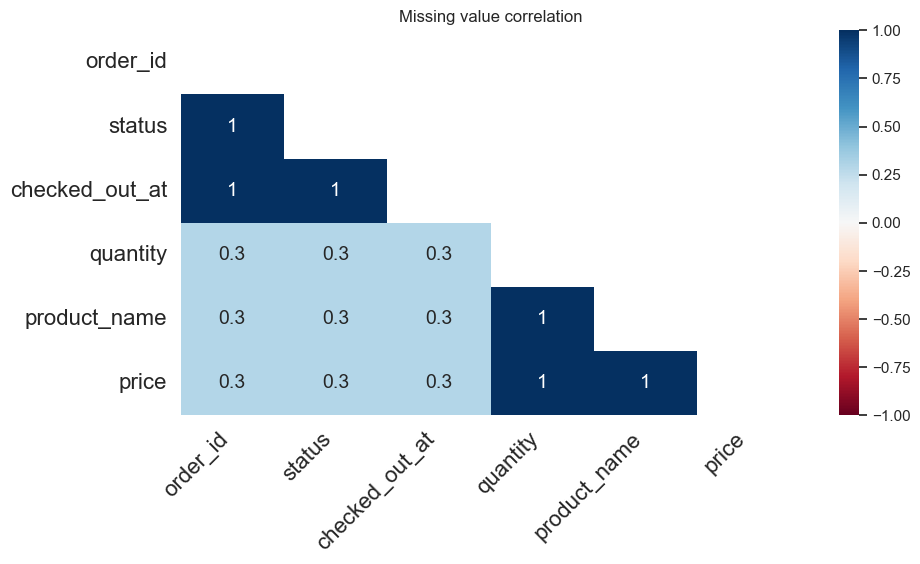

In [17]:
ax = missingno.heatmap(new_data,figsize=(10,5)).set_title('Missing value correlation')

In [18]:
new_data['currency'] = new_data['currency'].astype('category')

### Date Time Transformation

In [19]:
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'],format='%Y-%m-%dT%H:%M:%S.%f')
new_data['checked_out_at'] = pd.to_datetime(new_data['checked_out_at'], format='%Y-%m-%d %H:%M:%S.%f')

In [20]:
total_days = (new_data["timestamp"].max() - new_data["timestamp"].min()).total_seconds()
days = total_days // (24 * 60 *60) # 24 hours * 60 minutes * 60 seconds
remaining_seconds = total_days  % (60*60*24) # 60 minutes * 60 seconds to get the remaining seconds
hours = remaining_seconds // 60 # 60 seconds
result = f"{int(days)} days {int(hours)} hours"

In [21]:
printmd(f'Dataset start date = {new_data["timestamp"].dt.date.min()}')
printmd(f'Dataset end date = {new_data["timestamp"].dt.date.max()}')
printmd(f'Dataset Spanning Through {result}')

Dataset start date = 2024-03-19

Dataset end date = 2024-03-30

Dataset Spanning Through 11 days 16 hours

## Feature Engineering
<a id=2></a>

In [22]:
new_data['day'] = new_data['timestamp'].dt.day_name()

In [23]:
country = new_data['country']
country = country.apply(lambda x: x.split('(')[0].strip())
# Replace country names so as to get them from awoc library
country.replace({'United States of America': 'United States',
                     'Congo': 'Democratic Republic of the Congo',
                     "Lao People's Democratic Republic":'Laos',
                     "Brunei Darussalam":'Brunei',
                     "Kyrgyz Republic":'Kyrgyzstan',
                     "Macao":'Macau',
                     "Palestinian Territory":"Palestine",
                     "Syrian Arab Republic":'Syria',
                     "Cote d'Ivoire":'Ivory Coast',
                     'Russian Federation':'Russia',
                     "North Macedonia":'Macedonia', 
                     'South Korea':'Korea',
                     'North Korea':'Korea',
                     'Cocos':'Cocos Islands',
                     "Libyan Arab Jamahiriya":'Libya'}, inplace=True)


In [24]:
all_countries = awoc.AWOC().get_countries() # get dictionary of all countries

In [25]:
new_data['continent'] = country.apply(get_continent)
# new_data['country'].replace({'Democratic Republic of the Congo':'Congo'},inplace=True) # 'Congo' is better for 

In [26]:
new_data['price_range'] = pd.qcut(new_data.price,3, labels=['low','mid','high']) # separating prices into three price range 

In [27]:
new_data['product_name'].replace({'iPhone 13':'Apple iPhone 13'}, inplace=True) # Added brand name to iPhone

In [28]:
new_data['brand'] = new_data['product_name'].apply(lambda x : x.split(' ')[0] if not pd.isna(x) else x) # extract brand name from products

In [29]:
# difference between maximum and minimum timestamp for each customer
new_data['number_of_days_transaction'] = np.ceil(
    new_data.groupby('customer_id')['timestamp'].transform(
        lambda x:np.ptp(x)).dt.total_seconds()/86400) #86400 is the total seconds in a day

In [30]:
new_data['total_order_price'] = new_data['quantity'] * new_data['price']

## 4. Exploratory Data Analysis 
<a id="3"></a>

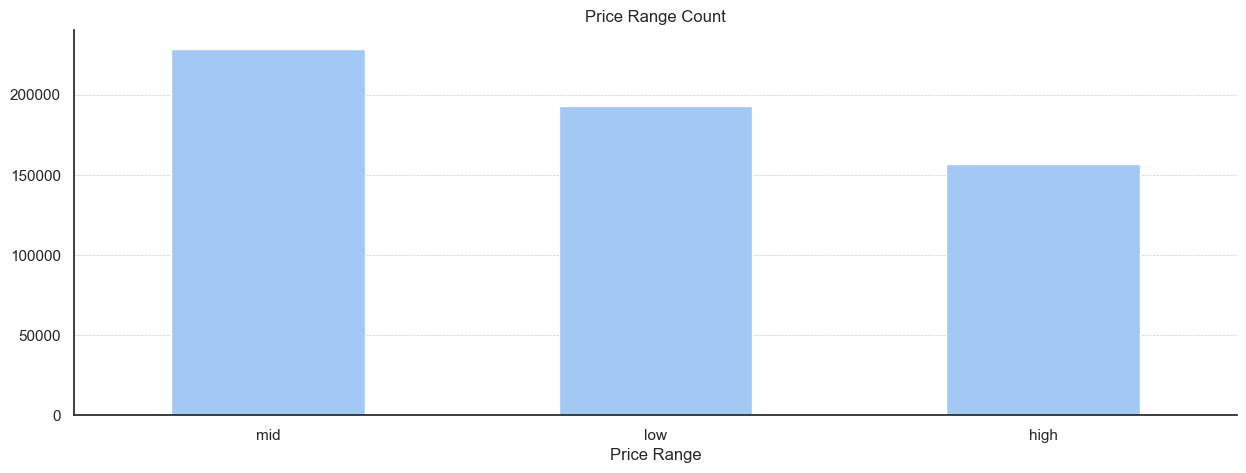

In [31]:
ax = new_data['price_range'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel('Price Range')
plt.title('Price Range Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [32]:
printmd('Of all transaction performed, **total of customers** are **{1}** <br> **Total devices** used on the sites are **{0}** <br>**Total transactions** are **{2}**'.format(new_data['device_id'].nunique(),new_data['customer_id'].nunique(),new_data['order_id'].nunique()))
printmd(f'Total number of products are **{products.shape[0]}**')
printmd(f'Total number of Countries are **{len(new_data["country"].unique())}**')


Of all transaction performed, **total of customers** are **10000** <br> **Total devices** used on the sites are **10000** <br>**Total transactions** are **9165**

Total number of products are **15**

Total number of Countries are **243**

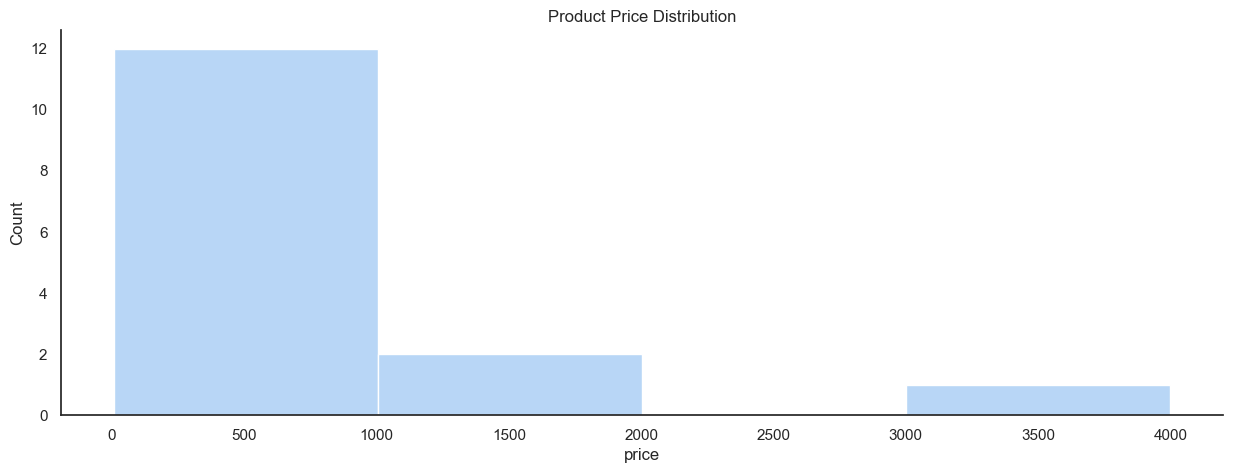

In [33]:
# price distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(products['price'],bins=4)
ax.set_title('Product Price Distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Most of the products prices are within the range of $1 to $1000 

In [34]:
corr_features = ['quantity','price','number_of_days_transaction']
new_data[corr_features].corr()

,quantity,price,number_of_days_transaction
quantity,1.000000,0.003496,-0.003684
price,0.003496,1.000000,0.008807
number_of_days_transaction,-0.003684,0.008807,1.000000



There are just **negligible positive correlation** between the price and the quantity, \
**Negligible Negative Correlation** between quantity and number of days of transaction

There is no relationship in the price and the quantity of products checked out

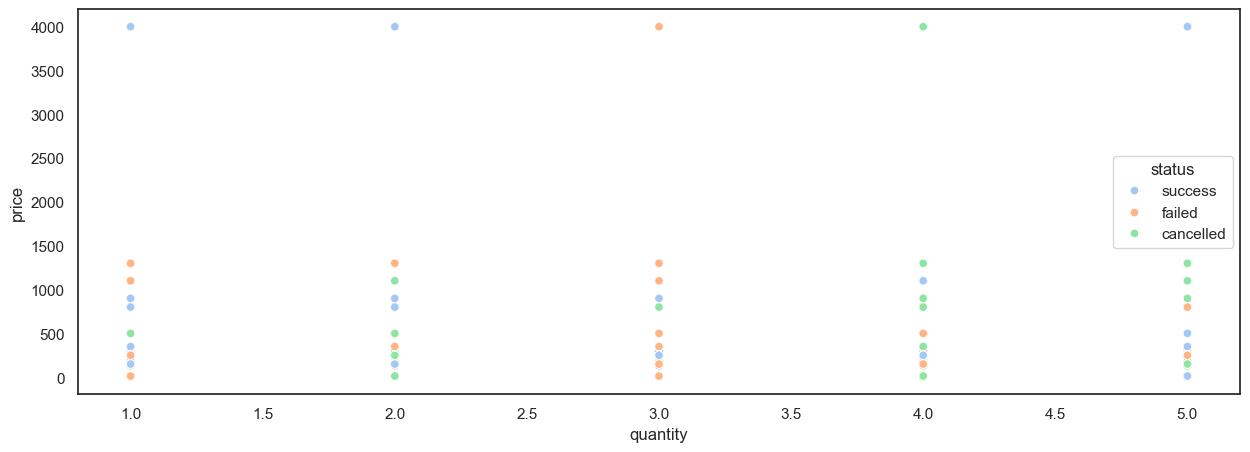

In [35]:
# correlation between price and quantity of product bought
plt.figure(figsize=(15,5))
ax = sns.scatterplot(data=new_data[new_data['event_type'] == 'checkout'], x='quantity',y='price', hue='status')
printmd('There is no relationship in the price and the quantity of products checked out')
plt.show()

In [36]:
printmd("There is **no correlation** (pattern) between the **quantity of product** purchased and the **price of the products**") 

There is **no correlation** (pattern) between the **quantity of product** purchased and the **price of the products**

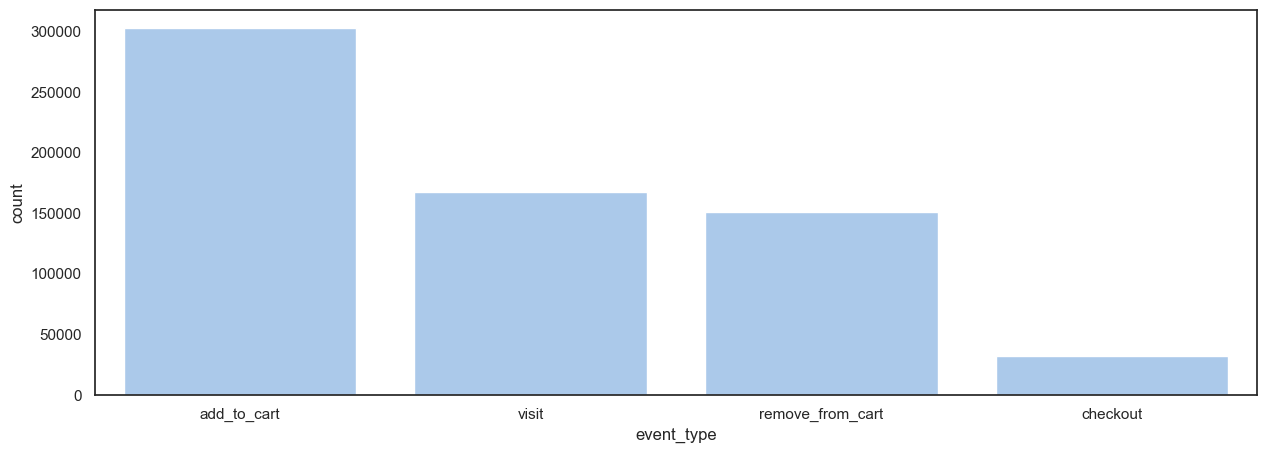

In [37]:
plt.figure(figsize=(15,5))
event_types = new_data['event_type'].value_counts()
ax = sns.barplot(event_types)
plt.show()

In [38]:
printmd(f'Majority of the order status are either **cancelled (33.70%)** or **Failed (33.58%)** while success is just (32.71%). Therefore **Unsuccessful orders** are **{(33.7+33.58) - 32.71}%** more than the **successful purchase**')

Majority of the order status are either **cancelled (33.70%)** or **Failed (33.58%)** while success is just (32.71%). Therefore **Unsuccessful orders** are **34.57%** more than the **successful purchase**

### 4.1 Visit Frequency 
<!-- <a id="3.1"></a> -->
- How often do customer visit the website, based on the provided data?
- Can you identify any patterns or trends in the customer's visit frequency?


In [39]:
#get the event type which are equal to visit
event_visit_type = new_data[new_data['event_type'] == 'visit']
event_visit_type.head()

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,total_order_price
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-21 12:47:11.012084,visit,Thursday,Asia,NaN,NaN,9.0,NaN
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-27 11:35:50.208930,visit,Wednesday,Asia,NaN,NaN,9.0,NaN
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30 04:03:10.392205,visit,Saturday,Asia,NaN,NaN,9.0,NaN
9,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14762,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,NaN,NaN,NaN,2024-03-19 06:08:39.175184,visit,Tuesday,North America,NaN,NaN,11.0,NaN
10,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14763,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,NaN,NaN,NaN,2024-03-26 05:51:26.514840,visit,Tuesday,North America,NaN,NaN,11.0,NaN


#### 4.1.1 Visited and Added to Cart vs Visited Only 

In [40]:
visited_n_ordered = event_visit_type.groupby(event_visit_type['order_id'].isna())['customer_id'].nunique()
fig = px.pie(values = visited_n_ordered.values, names=['Order','Didn"t Order'],hole=0.5)
fig.update_layout(title='Customer that Visited and Ordered vs Visited Only')

**91.6%** of the customers that visited did more than just visit, they added to cart, removed and checkout, though some of the checkouts are not successful and some were successful

#### 4.1.2 Visited and Checkedout

In [41]:
visit_status = event_visit_type.groupby('status')['customer_id'].nunique()
fig = go.Figure(data=go.Pie(labels=visit_status.index, values=visit_status, hole=0.5))
fig.update_layout(title = 'Customers that Visited and Checked out with their order status')
fig.show()

In [42]:
printmd('Out of the **1000 customers**, **9165** orders were placed, **successful transaction (32.7%)**, **failed transaction (33.6%)** while **cancelled (33.7%)** ')
printmd('The likelihood of a customer visiting and successfully purchasing a product is low as the amount of failed and cancelled are more than the number of success')

Out of the **1000 customers**, **9165** orders were placed, **successful transaction (32.7%)**, **failed transaction (33.6%)** while **cancelled (33.7%)** 

The likelihood of a customer visiting and successfully purchasing a product is low as the amount of failed and cancelled are more than the number of success

#### 4.1.3 VIsit Day and Time

#### 4.1.4 Number of days customers used in visiting

In [43]:
visit_day_number = event_visit_type.groupby('number_of_days_transaction')['customer_id'].nunique()
percentages = get_percentages(visit_day_number)
fig = px.bar(x=visit_day_number.index,y=visit_day_number.values,text=percentages.apply(lambda x :str(x) + '%'))
median_median = event_visit_type.groupby('customer_id')['number_of_days_transaction'].median().median()
fig.add_vline(x=median_median, line_dash="dash", line_color="red", annotation_text=f'Median: {median_median}', annotation_position="top right")

fig.update_layout(title='Number of visits days by customers',xaxis_title='Number of Days of Transaction',yaxis_title='Count')
fig.update_traces(hovertemplate="day of transaction = %{x}, number of customers visit = %{y}",textposition='auto')
fig.show()

In [44]:
printmd(f"**{percentages.iloc[0]}%** of the customers visit the website for **just one day** while it can be seen that there is an increase in some customers visit after **day 2** till **day 11** after which there is almost absolute drop to zero. \nThe means that customers\
    **that dont finish their transaction on same day may take up to 11 days to** to make decision on the products they want to purchase")
printmd('The transaction days median value is the first day which also support the fact that **most visits lasts a day**')

**50.31%** of the customers visit the website for **just one day** while it can be seen that there is an increase in some customers visit after **day 2** till **day 11** after which there is almost absolute drop to zero. 
The means that customers    **that dont finish their transaction on same day may take up to 11 days to** to make decision on the products they want to purchase

The transaction days median value is the first day which also support the fact that **most visits lasts a day**

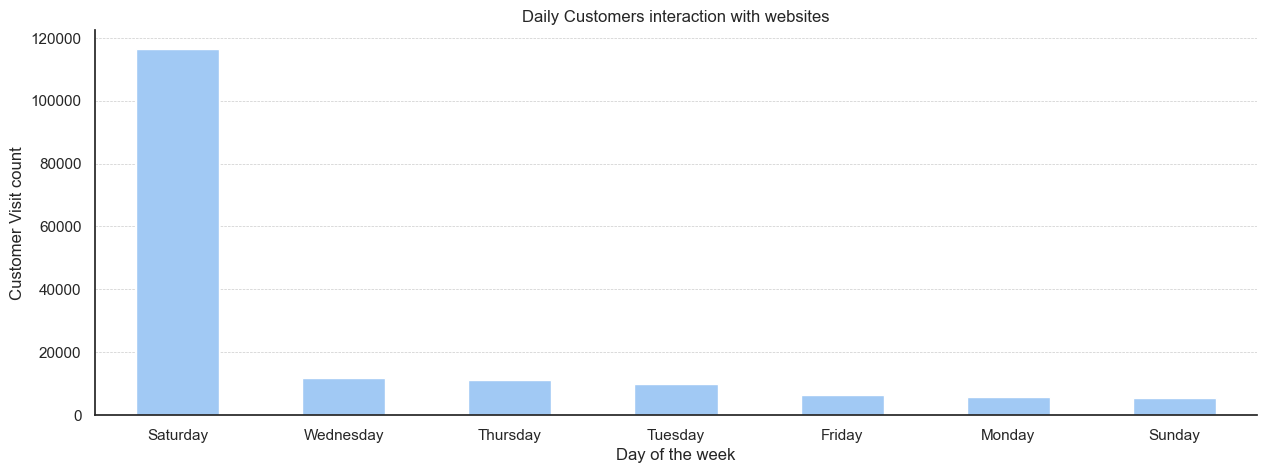

The website is <b>VISITED</b> mostly on <b>SATURDAY</b> while <b>SUNDAY</b> has the <b>LEAST VISIT</b>

In [45]:
ax = event_visit_type['timestamp'].dt.day_name().value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Daily Customers interaction with websites')
plt.xticks(rotation=0)
plt.xlabel('Day of the week')
plt.ylabel('Customer Visit count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
printmd('The website is <b>VISITED</b> mostly on <b>SATURDAY</b> while <b>SUNDAY</b> has the <b>LEAST VISIT</b>')

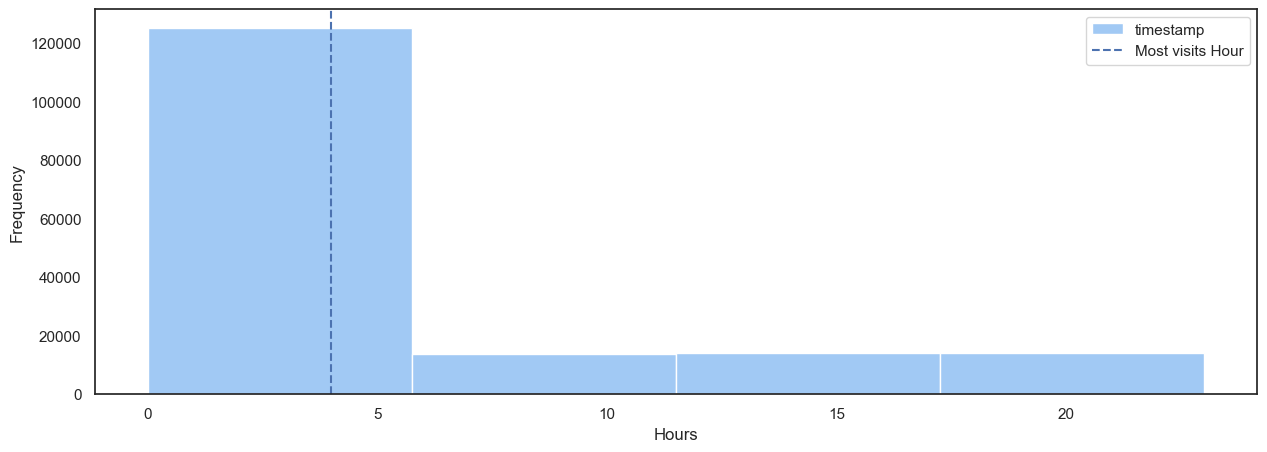

Customers visit the websites mostly during the <b>FIRST QUARTER</b> of the day which is between <b>12 AM</b> to <b>6 AM</b> and the **highest visit** being <b>4 AM hour</b>

In [46]:
ax = event_visit_type['timestamp'].dt.hour.plot(kind='hist',bins=4,figsize=(15,5))
mode_hour = new_data['timestamp'].dt.hour.mode()[0]
plt.axvline(mode_hour, color='b', linestyle='--', label='Most visits Hour')
plt.legend()
ax.set_xlabel('Hours')
plt.show()

printmd('Customers visit the websites mostly during the <b>FIRST QUARTER</b> of the day which is between <b>12 AM</b> to <b>6 AM</b> and the **highest visit** being <b>4 AM hour</b>')

#### 4.1.5 Continents and Countries of visits

In [47]:
visit_country = event_visit_type.groupby('continent')['customer_id'].nunique().sort_values(ascending=False)
percentages = get_percentages(visit_country)
fig = go.Figure(data=go.Bar(x=visit_country.index, y=visit_country.values, text=percentages.apply(lambda y :str(y) + '%')))
fig.update_layout(title = 'Visit by Continent of customers')
fig.show()

In [48]:
printmd(f'Most of the visits to the website are customers from **{percentages.index[0]} ({percentages.values[0]}%)**,**{percentages.index[1]} ({percentages.values[1]}%)** and **{percentages.index[2]}({percentages.values[2]}%)** making the **top 3** of the continents that visits the website')

printmd("Customers from **Africa**, are the **highest visitor**, followed by Asian customers and Europe, the place where customers are least is the Antarctica, This is expected as the amount of counrties in Africa are more than than Asia and Asia are more than others")

Most of the visits to the website are customers from **Africa (22.72%)**,**Asia (21.49%)** and **Europe(19.82%)** making the **top 3** of the continents that visits the website

Customers from **Africa**, are the **highest visitor**, followed by Asian customers and Europe, the place where customers are least is the Antarctica, This is expected as the amount of counrties in Africa are more than than Asia and Asia are more than others

In [49]:
event_visit_type.groupby('country')['customer_id'].nunique()

country
Afghanistan          40
Albania              42
Algeria              46
American Samoa       36
Andorra              48
                     ..
Wallis and Futuna    30
Western Sahara       43
Yemen                33
Zambia               36
Zimbabwe             38
Name: customer_id, Length: 243, dtype: int64

In [50]:
# customer_visit
product_visit = pd.pivot(data=event_visit_type, values='product_name', columns='country').mode().stack()[0].reset_index(name='most visited product')
customer_visit = pd.merge(event_visit_type.groupby('country')['customer_id'].nunique().reset_index(name='count'),product_visit,on='country')
customer_visit.head()

,country,count,most visited product
0,Afghanistan,40,Canon EOS R5 Camera
1,Albania,42,Samsung Galaxy S21
2,Algeria,46,Sony PlayStation 5
3,American Samoa,36,Microsoft Xbox Series X
4,Andorra,48,Canon EOS R5 Camera


In [51]:
fig = go.Figure(data=go.Choropleth(
    locations = customer_visit['country'],
    locationmode='country names',
    z = customer_visit['count'],
    colorscale = 'amp_r',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Customer count',
    hovertemplate='Country:<b> %{location}</b><br>Customer count:<b> %{z}</b><br>'
                  'Most visited product:<b> %{customdata}</b><extra></extra>',
    customdata=customer_visit['most visited product']
    ))

fig.update_layout(
    title_text='Customers Visits by Country with most visited Product',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

#### 4.1.6 Most visited brand and Products

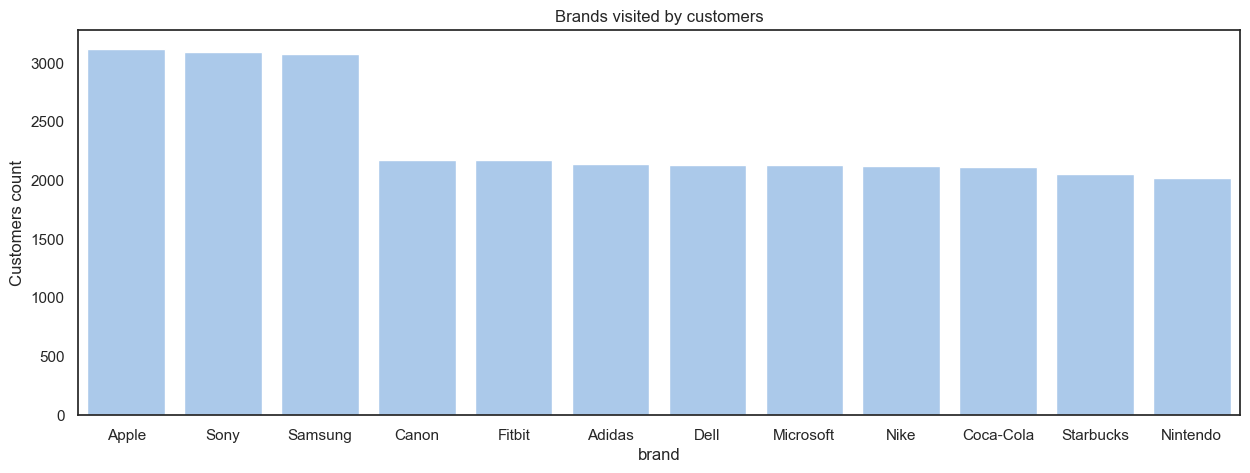

In [52]:
brand_customers_visit = event_visit_type.groupby('brand')\
['customer_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(brand_customers_visit)
ax.set_title('Brands visited by customers')
ax.set_ylabel('Customers count')
plt.show() 

In [53]:
printmd('During the customers visit, **Apple, Sony and Samsung** brands are the **most interacted with**.\
    The brands with high value are obvious because they have products which is more than one.<br>\
        As such it is advised that ShopSmart get **more products from these brands** can generate more revenue')

During the customers visit, **Apple, Sony and Samsung** brands are the **most interacted with**.    The brands with high value are obvious because they have products which is more than one.<br>        As such it is advised that ShopSmart get **more products from these brands** can generate more revenue

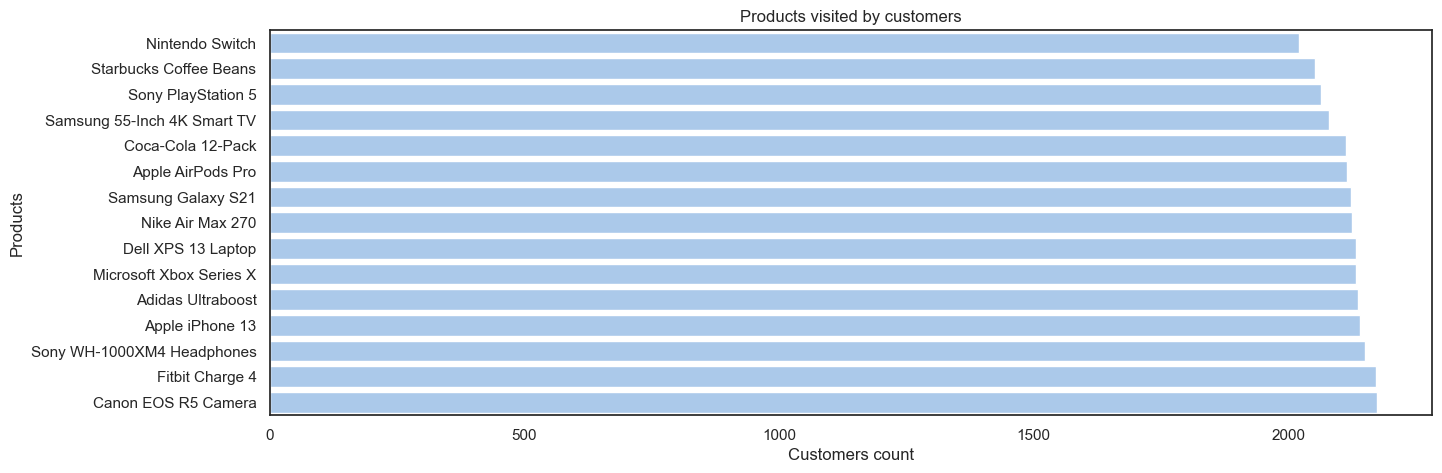

The visit difference between the products are not quite much so it can be said that all ShopSmart Products are wanted by the customers


In [54]:
brand_customers_visit = event_visit_type.groupby('product_name')\
['customer_id'].nunique().sort_values()
plt.figure(figsize=(15,5))
ax = sns.barplot(brand_customers_visit,orient='h')
ax.set_title('Products visited by customers')
ax.set_ylabel('Products')
ax.set_xlabel('Customers count')
plt.show()
print("The visit difference between the products are not quite much so it can be said that all ShopSmart Products are wanted by the customers")

#### 4.1.7 Most visited Products by Country and Continent

In [55]:
product_visit = pd.pivot(data=event_visit_type, values='brand',
                         columns='continent').mode().stack()[0]
product_checkout = pd.pivot(data=new_data[(new_data['event_type'] == 'checkout')], values='brand',
                            columns='continent').mode().stack()[0]
product_result = pd.concat([product_visit,product_checkout],axis=1,
                           ignore_index=True,names=['visit','checkout'])

printmd('Each **CONTINENT** and the product customers **VISITED THE MOST**:\n')
display(product_result.reset_index().rename(columns={'level_0': 'continent', 0: 'most visited brand',1:'most checked out'}))
printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

Each **CONTINENT** and the product customers **VISITED THE MOST**:


,continent,most visited brand,most checked out
0,Africa,Apple,Apple
1,Antarctica,Samsung,Samsung
2,Asia,Apple,Apple
3,Europe,Sony,Samsung
4,North America,Samsung,Sony
5,Oceania,Samsung,Apple
6,Other Islands,Samsung,Samsung
7,South America,Apple,Sony


Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.

<a id="4.2"></a>
### 4.2 Location Analysis:
- What is the customer's location based on the provided data?
- How might the customer's location influence their purchasing behavior?


#### 4.2.1 customers location

,country,count
0,Korea,0.82
1,Congo,0.78
2,Guatemala,0.58
3,Argentina,0.58
4,Bangladesh,0.58
...,...,...
238,French Polynesia,0.27
239,Montenegro,0.27
240,Italy,0.27
241,Chad,0.25


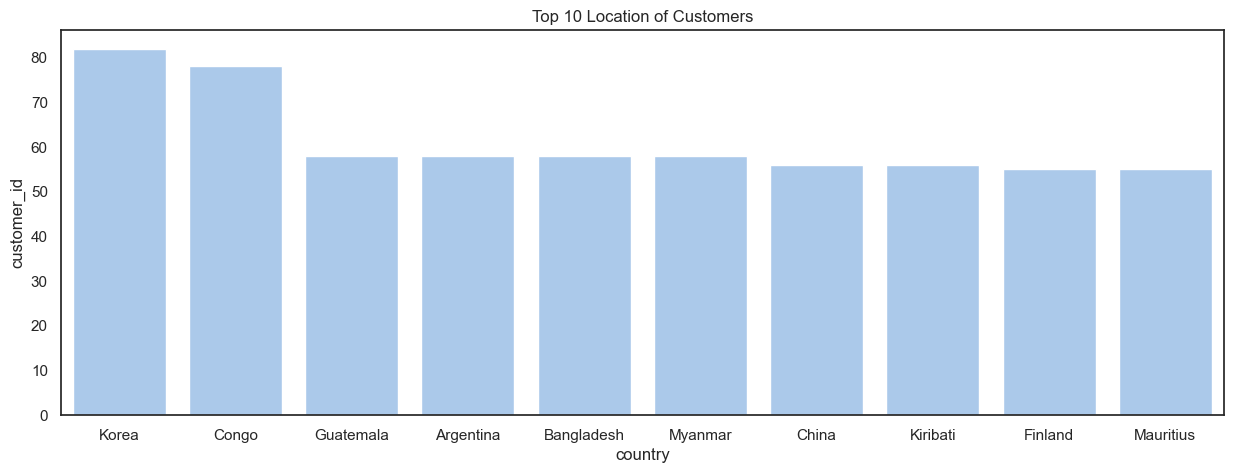

In [56]:
new_data_location = new_data.groupby('country')['customer_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(new_data_location[:10])
percentages = get_percentages(new_data_location)
display(percentages.reset_index(name='count'))
plt.title('Top 10 Location of Customers')
plt.show()

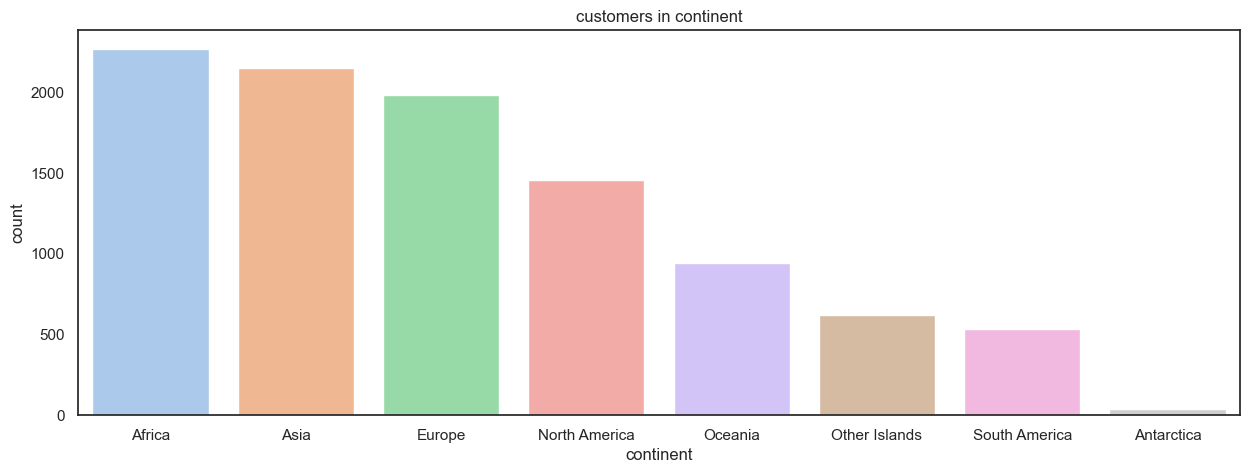

,continent,count,percentages
0,Africa,2272,22.72
1,Asia,2149,21.49
2,Europe,1982,19.82
3,North America,1458,14.58
4,Oceania,945,9.45
5,Other Islands,621,6.21
6,South America,537,5.37
7,Antarctica,36,0.36


In [57]:
new_data_location = new_data.groupby(['continent'])['customer_id'].nunique().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(15,5))
sns.barplot(new_data_location[:10], x='continent', y = 'count', hue='continent')
plt.title('customers in continent')
plt.show()
new_data_location['percentages'] = new_data_location['count'].div(new_data_location['count'].sum())*100

display(new_data_location)

In [58]:
printmd(f"Out of the **{new_data['country'].unique().shape[0]}** Countries, **22.72%** of them are **Africans**, followed by **Asia** with **21.49%** of the customers while **Antarctica (0.36)%** which is the least")

Out of the **243** Countries, **22.72%** of them are **Africans**, followed by **Asia** with **21.49%** of the customers while **Antarctica (0.36)%** which is the least

#### 4.2.1 Purchase Status of Customers by Continent

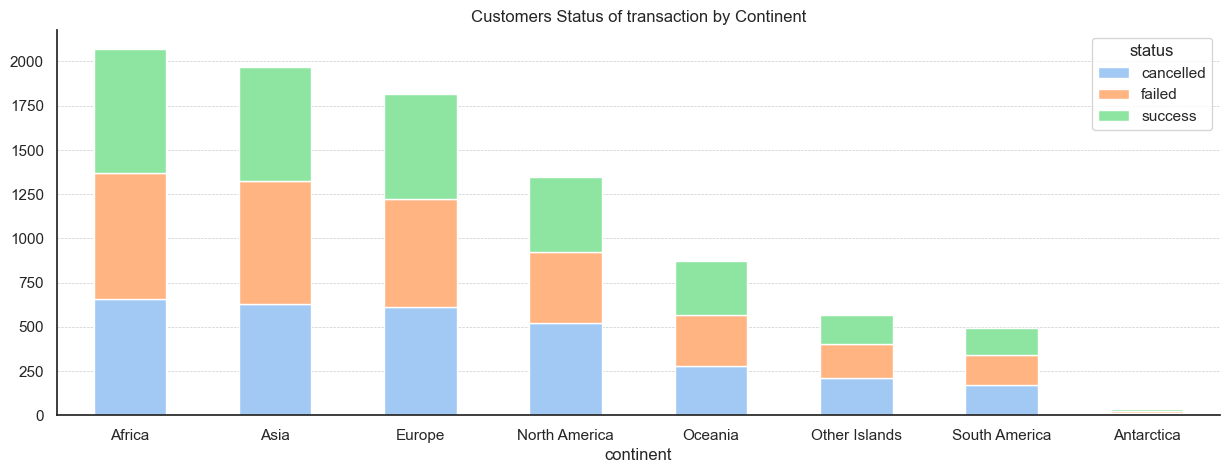

In [59]:
ax = new_data.groupby(['continent','status'])['customer_id'].nunique().unstack().sort_values(by=['failed','cancelled','success'], ascending=False).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title('Customers Status of transaction by Continent')
plt.show()

Africa has the highest transaction rate, followed by Asia and Europe. 

The Cancelled rate for these continents are fairly the same, but loooking at ther failed status their is reduction in the customers numbers,

while the 3 top continents also have nearly same amount of success checkout

# **MOVE TO Q3 OR DELETE IT**

In [60]:
result = new_data[new_data['status'] == 'success'].groupby('country')['customer_id'].nunique().sort_values(ascending=False)
percentages = get_percentages(result)
fig = px.bar(x=result.index[:10],y=result.values[:10],
             text=percentages[:10].apply(lambda x :str(x) + '%'))

fig.update_layout(title='Top 10 Countries with Customers Successful Order',xaxis_title='Country',yaxis_title='Count')
fig.show()

In [61]:
printmd(f'Out of **{result.sum()}** successful order, **0.83 %** of customers from **Korea**, **0.77%** from **Congo**, **0.73%** from **Mauritius** of customers while **the least {percentages[-1]}%** is from **{percentages.index[-1]}**')

Out of **2998** successful order, **0.83 %** of customers from **Korea**, **0.77%** from **Congo**, **0.73%** from **Mauritius** of customers while **the least 0.13%** is from **Isle of Man**

#### Event type and Location

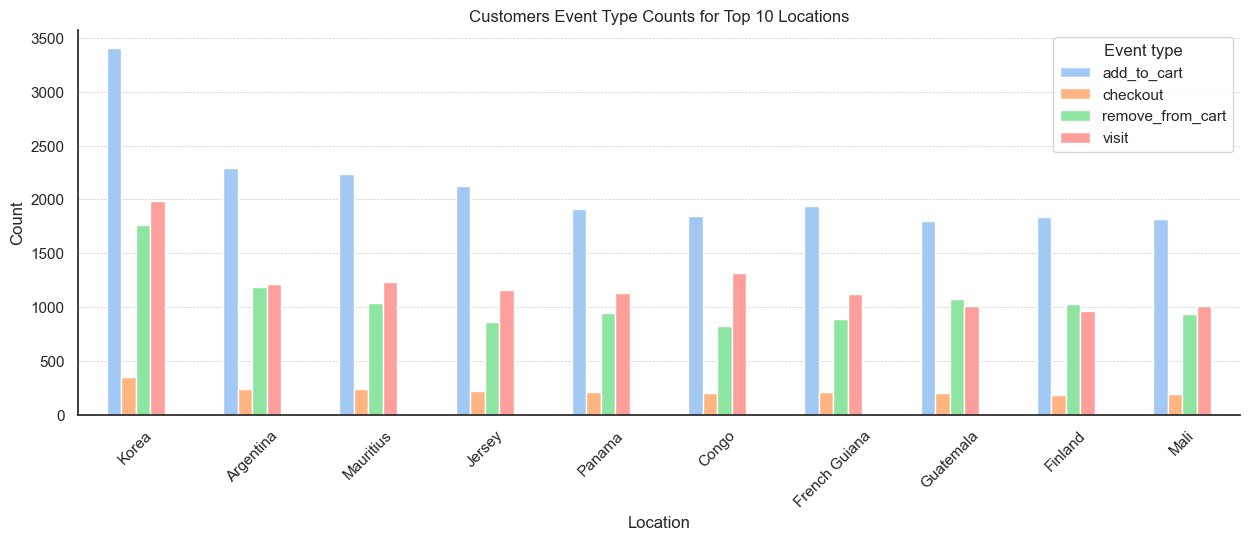

In [62]:
res = new_data.groupby(['country','event_type']).size().unstack()
res_total = res.sum(1).sort_values(ascending=False)
res = res.reindex(res_total.index)


ax = res[:10].plot(kind='bar', stacked=False,figsize=(15,5)) #plot top 10 locations and their status
plt.xlabel('Location')
plt.ylabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.title('Customers Event Type Counts for Top 10 Locations')
plt.legend(title='Event type')
plt.show()

#### Most Added to cart and Removed Product

In [63]:
added_removed('brand')
added_removed('product_name')

Each **CONTINENT** and the product customers **ADDED TO AND REMOVED FROM CART**:


,continent,added to cart,removed from cart
0,Africa,Sony,Sony
1,Antarctica,Apple,Samsung
2,Asia,Apple,Apple
3,Europe,Samsung,Samsung
4,North America,Sony,Sony
5,Oceania,Samsung,Samsung
6,Other Islands,Samsung,Samsung
7,South America,Sony,Sony


Each **CONTINENT** and the product customers **ADDED TO AND REMOVED FROM CART**:


,continent,added to cart,removed from cart
0,Africa,Canon EOS R5 Camera,Canon EOS R5 Camera
1,Antarctica,Coca-Cola 12-Pack,Samsung 55-Inch 4K Smart TV
2,Asia,Samsung Galaxy S21,Samsung Galaxy S21
3,Europe,Fitbit Charge 4,Fitbit Charge 4
4,North America,Canon EOS R5 Camera,Canon EOS R5 Camera
5,Oceania,Fitbit Charge 4,Fitbit Charge 4
6,Other Islands,Samsung 55-Inch 4K Smart TV,Microsoft Xbox Series X
7,South America,Dell XPS 13 Laptop,Dell XPS 13 Laptop


In [64]:
printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.

**Successful** - Based on Location **Oceania** has the most purchase quantity followed by **Asia** and **Europe**\
**Cancelled** - The most are from **North America**, **Other Islands** and **South America**\
**Failed** - The failed purchased quantity comes from **Africa**, **Asia** and **Europe** 

### 4.3.1 Overall Purchase Behavior: 
<a id='4.3'></a>

- Based on the data provided, what insights can you draw about this customer's overall behavior on the website?

- How might these insights inform marketing strategies or personalized recommendations for this customer?


Customers may wish to purchase products that are the most visited in their country or continents

In [65]:
# Orders checked out only
checkedout_only = new_data[(new_data['event_type'] =='checkout')]

# success status and checkout event type
success_checkout = new_data[(new_data['status'] == 'success')&(new_data['event_type'] == 'checkout')] 
success_checkout.head()

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,total_order_price
74651,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14799,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,2.0,Microsoft Xbox Series X,499.99,2024-03-30 04:19:10.406794,checkout,Saturday,Africa,mid,Microsoft,4.0,999.98
74673,11f73687-45ab-4665-9b1a-14356a593623,aefb983d-2b30-4e1b-97c1-3816f2aafd9d,Grenada,GBP,14935,bb15e304-1f09-4360-85da-1bbf58aa9669,success,2024-03-30 04:13:10.429566,2.0,Microsoft Xbox Series X,499.99,2024-03-30 04:13:10.429566,checkout,Saturday,North America,mid,Microsoft,10.0,999.98
74766,dd5ee53d-d40c-4c6b-b4de-730f60e253ea,154f5606-e68a-48a5-8c63-0fd5d26e632f,French Guiana,GBP,15258,b32b9260-7816-4bcf-a4d1-c4d3185a7e18,success,2024-03-30 04:20:10.473494,1.0,Microsoft Xbox Series X,499.99,2024-03-30 04:20:10.473494,checkout,Saturday,Other Islands,mid,Microsoft,11.0,499.99
74825,d243e1f3-0d18-4d9d-ac1a-2f9e132357ef,6df259de-262a-4631-a43f-49eee28554d7,Canada,NGN,15320,86f98785-8baa-412e-9978-4be50f61a119,success,2024-03-30 04:19:10.477760,1.0,Microsoft Xbox Series X,499.99,2024-03-30 04:19:10.477760,checkout,Saturday,North America,mid,Microsoft,11.0,499.99
74881,463e0e34-17be-49e3-9af4-46e6d9666fd7,ee1e261a-6637-4566-9ff5-cc8287082d0f,Chad,GBP,15590,0f6ba96a-ab4f-416f-be1c-fc045facee74,success,2024-03-30 04:17:10.493141,4.0,Microsoft Xbox Series X,499.99,2024-03-30 04:17:10.493141,checkout,Saturday,Africa,mid,Microsoft,1.0,1999.96


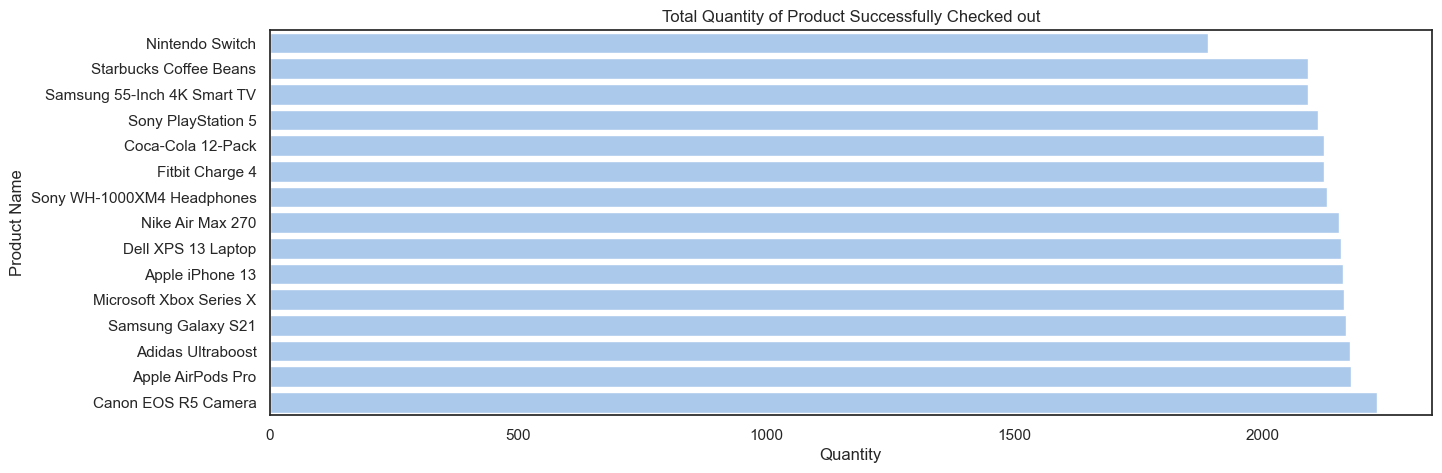

Most of the products Purchased are more than 2000 quantity with Canon EOS R5 Camera taking the lead and the least quantity is the Nintendo Switch

This suggests that the **market for Nintendo Switch Product is not as much as the market for other products**

In [66]:
# success_checkout_quantity
quantity_count = success_checkout.groupby('product_name')['quantity'].sum().sort_values()
plt.figure(figsize=(15,5))

ax = sns.barplot(y=quantity_count.index,x=quantity_count.values,orient='horizontal')
ax.set_title('Total Quantity of Product Successfully Checked out')
ax.set_ylabel('Product Name')
ax.set_xlabel('Quantity')
plt.show()
printmd('Most of the products Purchased are more than 2000 quantity with Canon EOS R5 Camera taking the lead and the least quantity is the Nintendo Switch')
printmd('This suggests that the **market for Nintendo Switch Product is not as much as the market for other products**')

In [67]:
success_checkout_customers = new_data[new_data['event_type'] == 'checkout']['customer_id'].nunique()

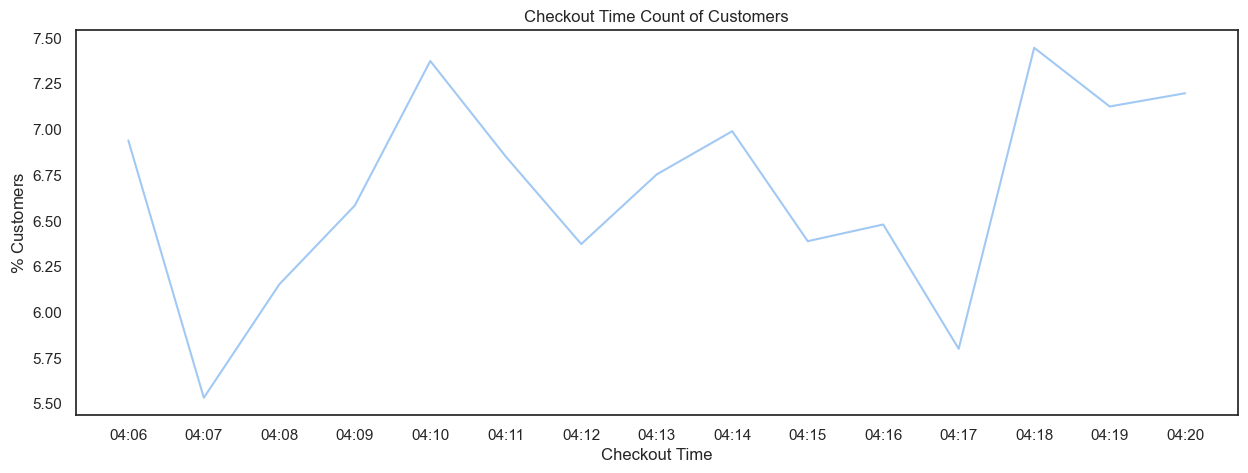

In [68]:
# all checkout
time_checkout = new_data[new_data['event_type'] == 'checkout']['checked_out_at'].dt.time.apply(
    lambda x:x.strftime('%H:%M')).value_counts(normalize=True).sort_index()
plt.figure(figsize=(15,5))
ax = sns.lineplot(data = time_checkout*100)
ax.set_xlabel('Checkout Time')
ax.set_ylabel('$\%$ Customers')
ax.set_title('Checkout Time Count of Customers')
plt.show()

In [69]:
printmd(f'The **average checkout** is **{new_data["checked_out_at"].mean().strftime("%H:%M")} AM**')
printmd(f"Of {success_checkout_customers}, **~7.4%** checked out at **04:18 AM** (most checkout) and **~5.5%** (least checkout) of the customers checked out at **04:08 AM**")

The **average checkout** is **04:13 AM**

Of 4594, **~7.4%** checked out at **04:18 AM** (most checkout) and **~5.5%** (least checkout) of the customers checked out at **04:08 AM**

#### Checkouts and Revenue with respect to number of transaction days

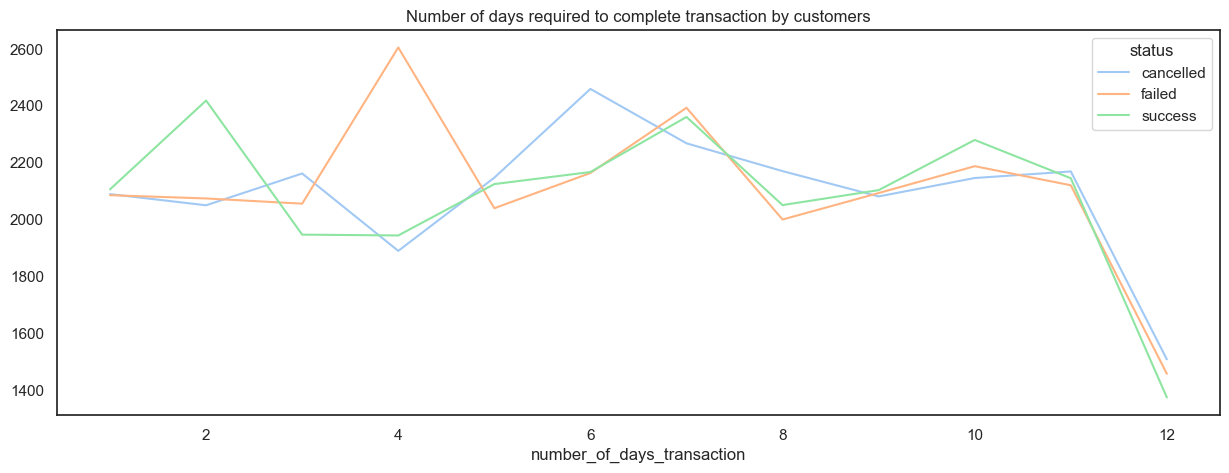

Failed Purchase after day 3 days is on the high, Services that can make the Customer to checkout instantly may be introduced  

In [70]:

result = checkedout_only.groupby(['number_of_days_transaction','status'])['total_order_price'].mean().unstack()
result.plot(kind='line',figsize=(15,5))
# plt.xlabel('')
# plt.ylabel('NUmber of days')
plt.title('Number of days required to complete transaction by customers')
plt.show()
printmd('Failed Purchase after day 3 days is on the high, Services that can make the Customer to checkout instantly may be introduced  ')

Many Customers who use than an average of **2 days** complete their transaction successfully  
Transactions on **day 4** to **day 6** are likely to get **cancelled or fail**  
Transactions of more than **2 days** should be reminded Customers about their purchase so they dont forget

#### Sum of Product Quantity Checked out

In [71]:
continent_status_rate = pd.pivot_table(
    data=new_data[new_data['event_type'] == 'checkout'],
    columns='continent', values='quantity',index = 'status',aggfunc='sum')

# Calculate percentages
total_counts = continent_status_rate.sum(axis=0)
percentages = (continent_status_rate.div(total_counts, axis=1) * 100).round(2)

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=continent_status_rate.values,
    x=percentages.columns,
    y=percentages.index,
    colorscale='oryel',
    colorbar=dict(title='Percentage')
))

for i in range(len(percentages.index)):
    for j in range(len(percentages.columns)):
        fig.add_annotation(
            x=percentages.columns[j],
            y=percentages.index[i],
            text=str(percentages.values[i, j]) + '%',
            showarrow=False,
            font=dict(color='white'))

# Update layout
fig.update_layout(
    title='Successsfuly Ordered Product Quantity by Continent',
    xaxis_title='Continent',
    yaxis_title='Status'
)

# Show figure
fig.show()


#### Currency Customers make payment in correlation with Status

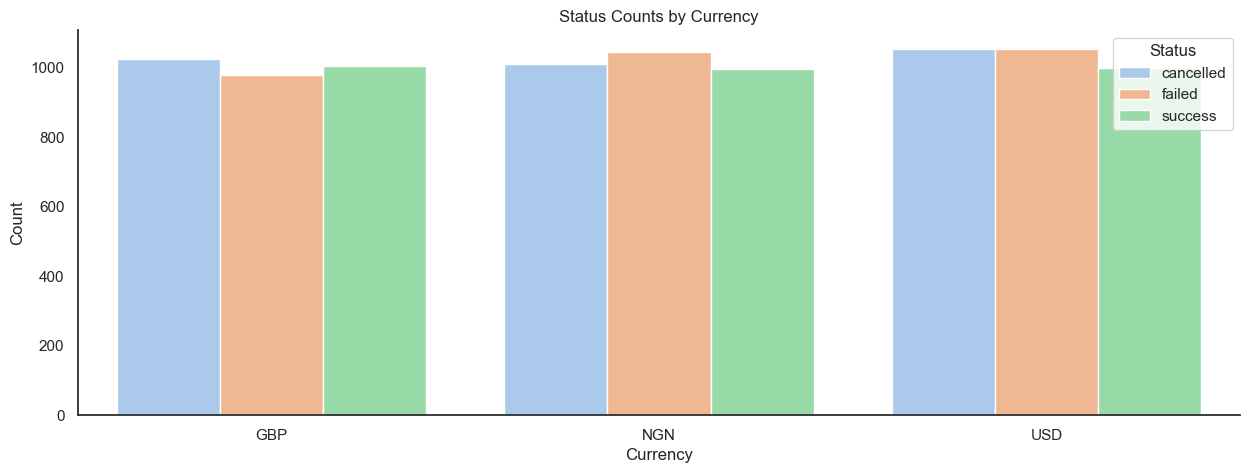

In [72]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=new_data.groupby(['currency', 'status'])['customer_id'].nunique().reset_index(), x='currency', y='customer_id', hue='status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Status Counts by Currency')
plt.legend(title='Status')
plt.show()


Though the difference on some of the currency used in transaction is not quite much, NGN shows to have the most failed purchase transactions compared to the cancelled and success rate followed by USD and GBP which seems to be the most reliable.

#### Removed From Cart

In [73]:
# new_data[new_data['event_type'] == 'remove_from_cart'].groupby('product_name')['customer_id'].unique()

In [74]:
removed_from_cart = new_data[new_data['event_type'] == 'remove_from_cart'].groupby(['product_name'])['customer_id'].nunique().sort_values()
printmd('**Customer that removed Product from Cart count:**')
# removed_from_cart/removed_from_cart.sum()*100
removed_from_cart

**Customer that removed Product from Cart count:**

product_name
Nintendo Switch                1975
Starbucks Coffee Beans         1999
Sony PlayStation 5             2007
Samsung 55-Inch 4K Smart TV    2033
Apple AirPods Pro              2054
Coca-Cola 12-Pack              2061
Apple iPhone 13                2062
Adidas Ultraboost              2065
Microsoft Xbox Series X        2067
Samsung Galaxy S21             2068
Dell XPS 13 Laptop             2073
Nike Air Max 270               2081
Sony WH-1000XM4 Headphones     2086
Canon EOS R5 Camera            2117
Fitbit Charge 4                2122
Name: customer_id, dtype: int64

In [75]:
printmd('A total of <b>Customers 2122 customers</b> removed **fitbit charge 4** from cart  <br><b>1975 customers</b> removed **Nintendo Switch**' )

A total of <b>Customers 2122 customers</b> removed **fitbit charge 4** from cart  <br><b>1975 customers</b> removed **Nintendo Switch**

In [76]:
# most revenue by brand 
most_revenue_by_brand = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')].groupby('brand')['total_order_price'].sum().sort_values(ascending=False)
total_revenue = most_revenue_by_brand.sum()
percentages = get_percentages(most_revenue_by_brand)
fig = px.bar(x=most_revenue_by_brand.index, y=most_revenue_by_brand.values, text=percentages.apply(lambda y :str(y) + '%'), height=400, width=900)
fig.update_layout(title='Successfully Purchased Brands and Their Revenue')
fig.update_yaxes(title_text='Revenue')
fig.update_xaxes(title_text='Brand')
fig.show()


#### Revenue of Successfuly Purchased Products

In [77]:

result = success_checkout.groupby('product_name')['total_order_price'].sum().sort_values(ascending=False)
percentages = get_percentages(result)
fig = px.bar(x=result.index, y=result.values, text=percentages.apply(lambda y :str(y) + '%'), height=400, width=900)
fig.update_layout(title='Successfully Purchased Product and Their Revenue')
fig.update_yaxes(title_text='Revenue')
fig.update_xaxes(title_text='Product')
fig.show()

In [78]:
print(f'Total Revenue is ${round(total_revenue,2)}')
quantity_count

Total Revenue is $22760347.19


product_name
Nintendo Switch                1891.0
Starbucks Coffee Beans         2092.0
Samsung 55-Inch 4K Smart TV    2093.0
Sony PlayStation 5             2112.0
Coca-Cola 12-Pack              2124.0
Fitbit Charge 4                2124.0
Sony WH-1000XM4 Headphones     2131.0
Nike Air Max 270               2155.0
Dell XPS 13 Laptop             2158.0
Apple iPhone 13                2162.0
Microsoft Xbox Series X        2164.0
Samsung Galaxy S21             2169.0
Adidas Ultraboost              2178.0
Apple AirPods Pro              2179.0
Canon EOS R5 Camera            2231.0
Name: quantity, dtype: float64

CANON EOS R5 CAMERA **(39.2%)** is the Lead Revenue generator, though it's brand has only one product,it's high price **($3999.99)** and the quantity **(2231)** bought gave it huge revenue percentage, Customers still purchase **CANON EOS R5 CAMERA** due various reasons which can be examined in future analysis

After **Canon** brand, **Samsung** brands generate the second highest revenue, it also has **two products** while **Starbucks and Coca-Cola** are the least revenue generating brands with each brand having **one product respectively**


#### Total Revenue from Products Successfully Purchased 

In [79]:
successful_checkedout_country_total = success_checkout.groupby(
    ['country'])['total_order_price'].sum().sort_values(ascending=False)
successful_checkedout_country_total

country
Singapore                 252274.67
Korea                     247149.42
Mauritius                 241841.76
Bosnia and Herzegovina    222098.53
Rwanda                    217881.10
                            ...    
Comoros                    11169.89
Uruguay                     8513.70
Kyrgyz Republic             6697.77
Malaysia                    2119.96
Slovenia                     180.00
Name: total_order_price, Length: 243, dtype: float64

#### Top 10 Country Revenue

country
Singapore                 1.11
Korea                     1.09
Mauritius                 1.06
Bosnia and Herzegovina    0.98
Rwanda                    0.96
                          ... 
Comoros                   0.05
Uruguay                   0.04
Kyrgyz Republic           0.03
Malaysia                  0.01
Slovenia                  0.00
Name: total_order_price, Length: 243, dtype: float64

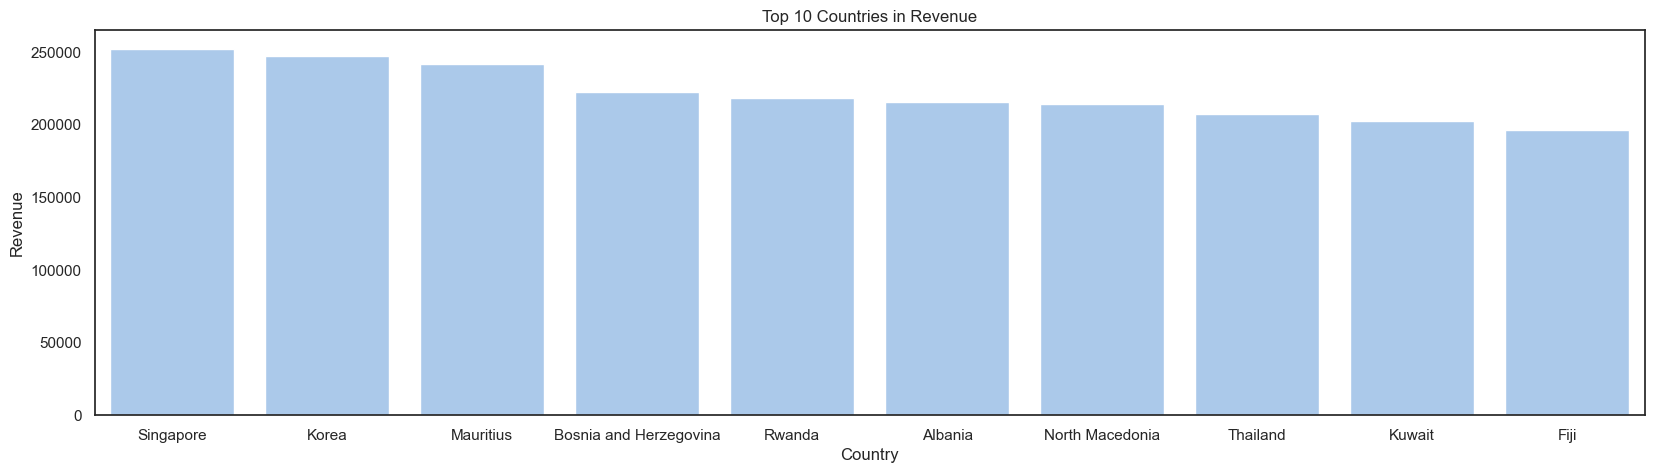

In [80]:
plt.figure(figsize=(20,5))
sns.barplot(data=successful_checkedout_country_total[:10])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 10 Countries in Revenue')
percentages = get_percentages(successful_checkedout_country_total)
percentages

**Singapore** is the country with the **highest Revenue contributing 1.11%**

**Korea** though has the **highest amount of Interaction(visits) with the website**, the country is **second** on the list of revenue generation followed by **Mauritius**

 **Slovenia** has the **least revenue generation (<0.01%)** of the revenue generation list 

#### Successfully Checked out Products and Revenue

,continent,number_of_days_transaction
5,Oceania,5.089256
0,Africa,5.061773
4,North America,4.816794
3,Europe,4.808093
2,Asia,4.737913
6,Other Islands,4.632549
7,South America,4.240583
1,Antarctica,2.583333


<Axes: xlabel='continent', ylabel='number_of_days_transaction'>

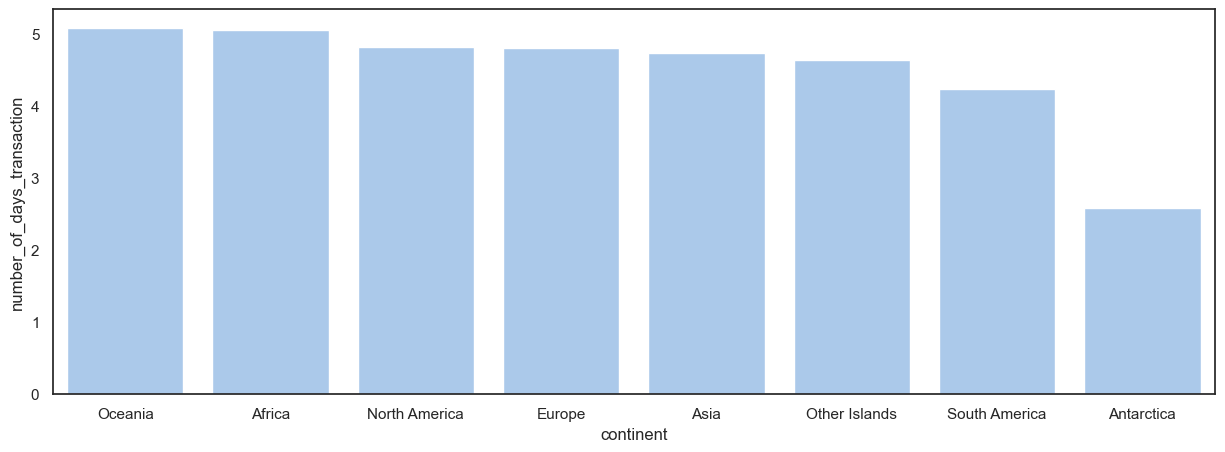

In [81]:
result = checkedout_only.groupby(['continent'])['number_of_days_transaction'].mean().reset_index().sort_values('number_of_days_transaction', ascending=False)
display(result)
plt.figure(figsize=(15,5))
sns.barplot(result,x='continent',y='number_of_days_transaction')

Text(160.25, 0.5, 'Number of Days')

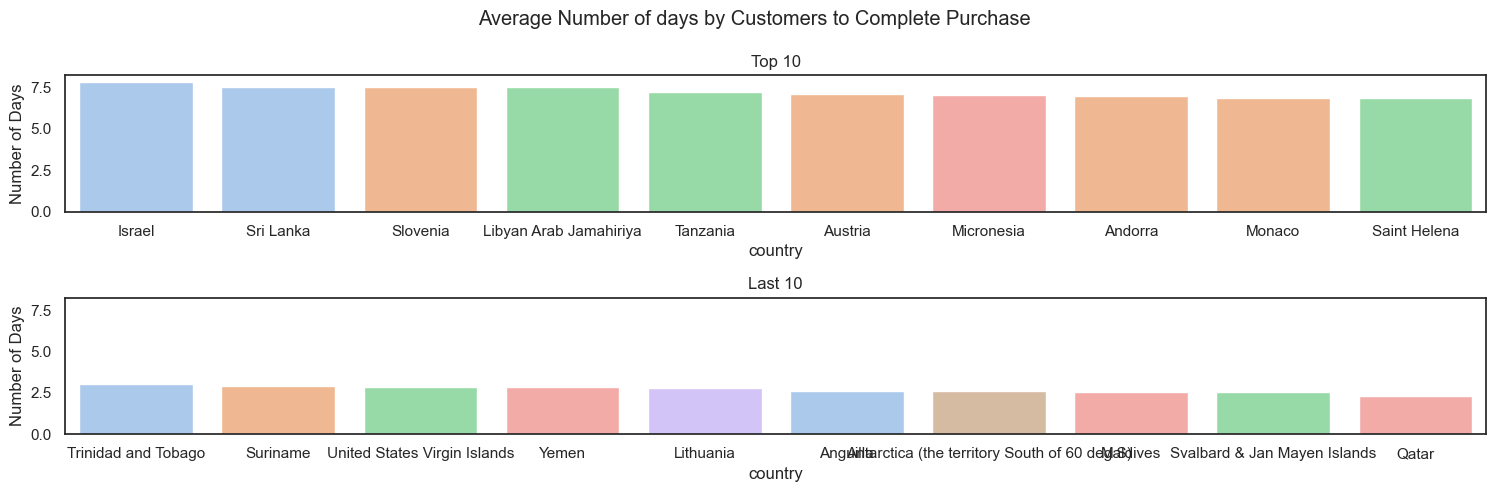

In [82]:
result = checkedout_only.groupby(['country','continent'])['number_of_days_transaction'].mean().reset_index().sort_values('number_of_days_transaction', ascending=False)
result
fig, axes = plt.subplots(2,1, figsize=(15,5), sharey=True)
axes = axes.flatten()
sns.barplot(result[:10],x='country',y='number_of_days_transaction', hue='continent',ax=axes[0],legend=False).set_title('Top 10')
sns.barplot(result.tail(10),x='country',y='number_of_days_transaction', hue='continent',ax=axes[1],legend=False).set_title('Last 10')
plt.suptitle('Average Number of days by Customers to Complete Purchase')
plt.tight_layout()
axes[0].set_ylabel('Number of Days')
axes[1].set_ylabel('Number of Days')

It is observed that **Isreali , Sri Lankans (Asia), Slovenia (Europe), Libya (Africa)** takes the highest average of Days  
**Qatar (Africa), Svalbard and Jan Mayen Islands (Other Islands), Maldives (Asia)** takes the least days to complete purchase

Creating of **discount/vouchers** which will help them to complete transactions should be introduced,
Customers from Continents and Countries that **take less time** should be able to **improve their service** e.g. speeding up support incase there is a required service from the support department can help keep these customers in making purchase in little timeframe

#### Customer with the highest Revenue

In [83]:
top3_customers = success_checkout.groupby(
    'customer_id')['total_order_price'].sum().sort_values(ascending=False).index[:3] # gets top 3 customers by revenue``
res = success_checkout[~success_checkout['product_name'].isin(
    success_checkout[success_checkout['customer_id'].isin(
    top3_customers)]['product_name'].unique())]['product_name'].unique()
printmd(f'The **items not purchased** by the top 3 purchasers is **{res[0] if len(res)>0 else "Not Available"}**' )

The **items not purchased** by the top 3 purchasers is **Starbucks Coffee Beans**

Text(0.5, 1.0, 'Correlation of Quantity of Brands Bought')

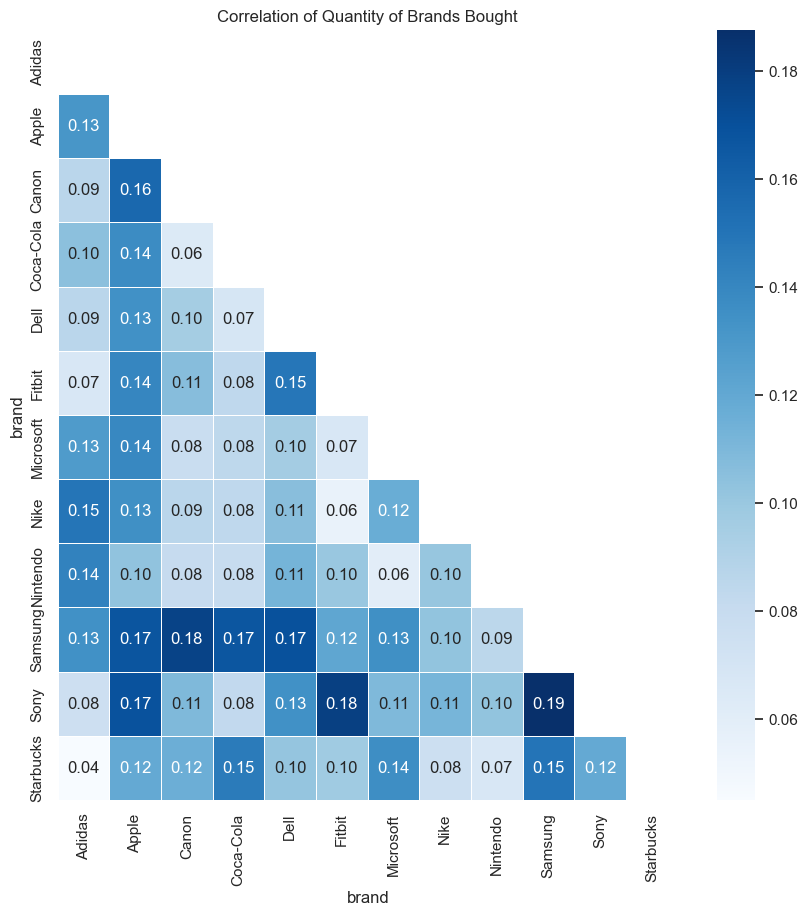

In [84]:
product_corr = pd.pivot_table(success_checkout,columns='brand',index='customer_id',aggfunc='sum',values='quantity',fill_value=0).corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(product_corr, dtype=bool))
ax = sns.heatmap(product_corr,annot=True,fmt='.2f',mask=mask,linewidth=0.6,cmap='Blues')
ax.set_title("Correlation of Quantity of Brands Bought")

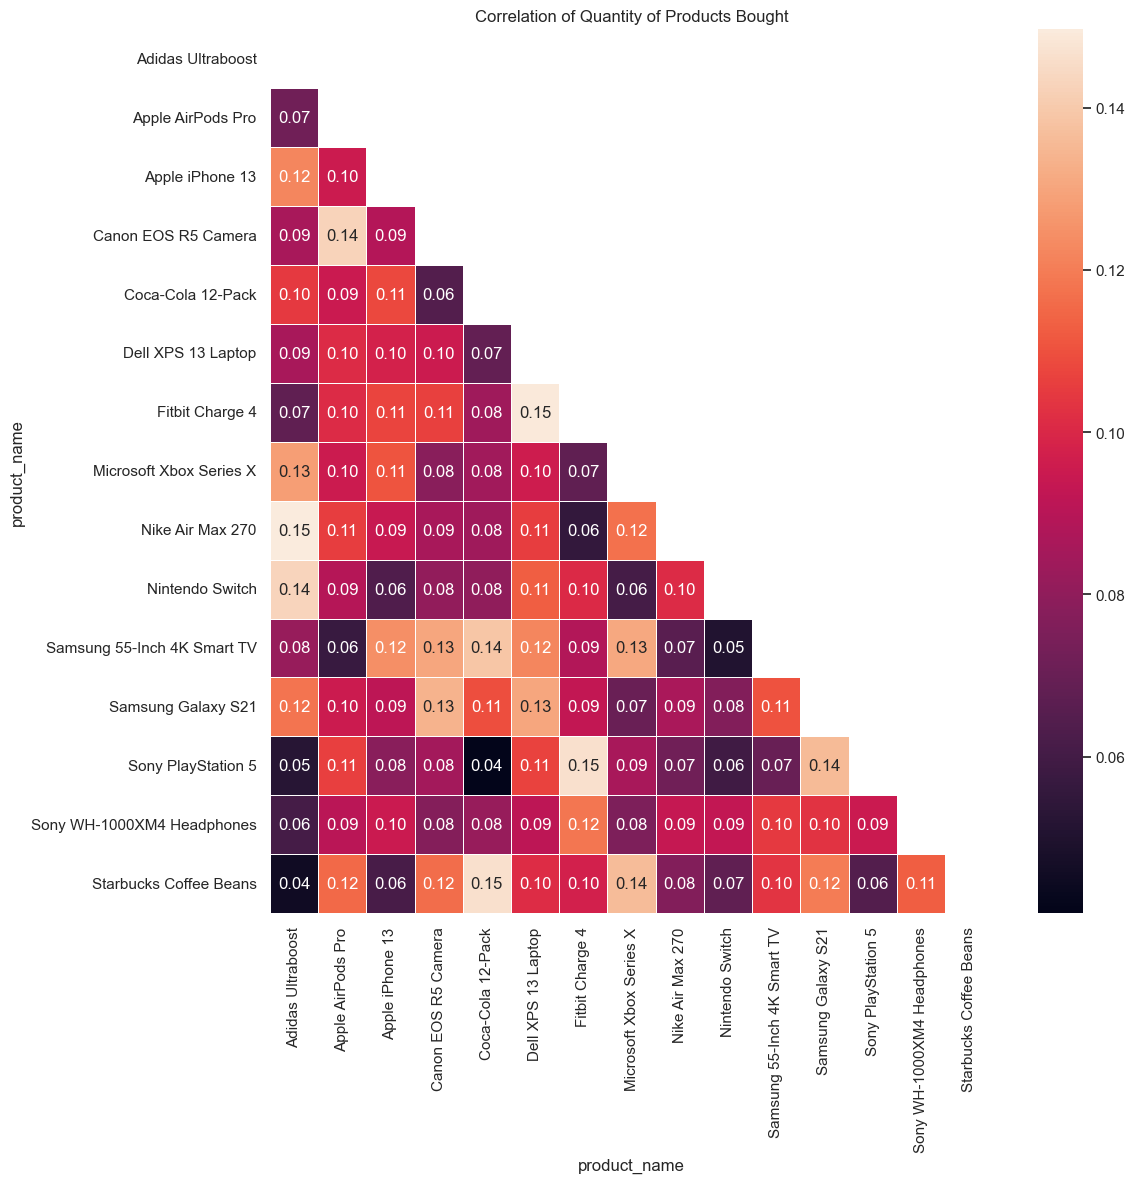

In [85]:
product_corr = pd.pivot_table(success_checkout,columns='product_name',index='customer_id',aggfunc='sum',values='quantity',fill_value=0).corr()
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(product_corr, dtype=bool))
ax = sns.heatmap(product_corr,annot=True,fmt='.2f',mask=mask,linewidth=0.6)
ax.set_title('Correlation of Quantity of Products Bought')
plt.tight_layout()

Correlation between the quantity of the products bought by customers

Some of the products that have **fair correlation** between 
- **Fitbit Charge 4** and **Sony Playstation**,
- **Coca-Cola 12-Pack** and **Starbucks**
- **Nike Air Max** and **Adidas Ultraboost**

In [86]:
df = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')].groupby('country')['total_order_price'].sum()


fig = go.Figure(data=go.Choropleth(
    locations = df.index,
    locationmode='country names',
    z = df.values,
    # text = df['country'],
    hovertext=df.values,
    colorscale = px.colors.sequential.amp_r,
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'Revenue',
    ))

fig.update_layout(
    title_text='Revenue Generated by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

**Top Revenue Countries by Continent**

Africa - Libya, Congo and Madagascar

Asia - Korea, Thailand

Europe -  France

Oceania - Australia and New Zealand

South America - Argentina

North America -  Mexico

Antarctica - Antarctica

In [87]:
# success_checkout.groupby('product_name')['total_order_price'].describe()